In [1]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/AI/Food

/content/drive/MyDrive/AI/Food


In [3]:
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
training=train_data.flow_from_directory('/content/drive/MyDrive/AI/Food/Train',target_size=(150,150), batch_size=32, class_mode='categorical')
validation=train_data.flow_from_directory('/content/drive/MyDrive/AI/Food/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 3008 images belonging to 10 classes.
Found 360 images belonging to 10 classes.


In [5]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [6]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 30 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size)
history=model.fit(training,epochs=30,batch_size=128,verbose=1, validation_data=validation)

Epoch 1/30
94/94 [==============================] - 1025s 11s/step - loss: 2.4135 - accuracy: 0.1875 - val_loss: 1.8625 - val_accuracy: 0.3611
Epoch 2/30
94/94 [==============================] - 73s 780ms/step - loss: 1.8712 - accuracy: 0.3278 - val_loss: 1.5655 - val_accuracy: 0.4194
Epoch 3/30
94/94 [==============================] - 73s 780ms/step - loss: 1.5840 - accuracy: 0.4581 - val_loss: 1.2884 - val_accuracy: 0.5528
Epoch 4/30
94/94 [==============================] - 75s 794ms/step - loss: 1.4266 - accuracy: 0.5189 - val_loss: 1.2500 - val_accuracy: 0.5611
Epoch 5/30
94/94 [==============================] - 73s 783ms/step - loss: 1.2707 - accuracy: 0.5708 - val_loss: 1.0915 - val_accuracy: 0.6528
Epoch 6/30
94/94 [==============================] - 74s 783ms/step - loss: 1.1545 - accuracy: 0.6134 - val_loss: 1.1791 - val_accuracy: 0.6083
Epoch 7/30
94/94 [==============================] - 74s 791ms/step - loss: 1.0528 - accuracy: 0.6466 - val_loss: 1.0375 - val_accuracy: 0.6611

In [7]:
# Lưu 
model.save("Food_VN.h5")
model_1=load_model('Food_VN.h5')

In [8]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.1642182469367981
Train Accuracy 0.953125


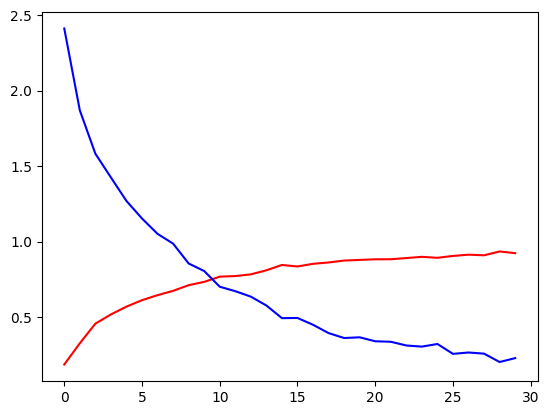

In [9]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label='Training accuracy')
plt.plot(epochs,loss,'b',label='Training loss')
plt.show()

1/1 [==============================] - 0s 373ms/step
BANH PIA


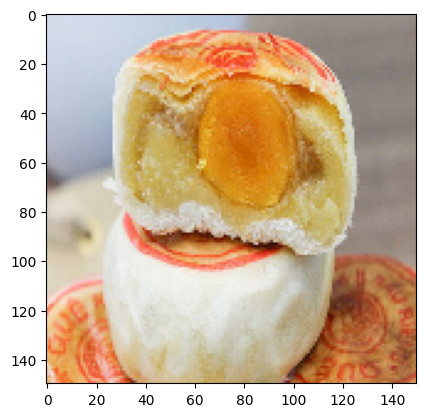

1/1 [==============================] - 0s 21ms/step
BANH TET


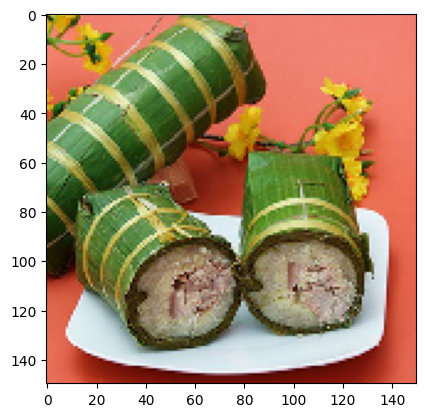

1/1 [==============================] - 0s 18ms/step
BANH MI


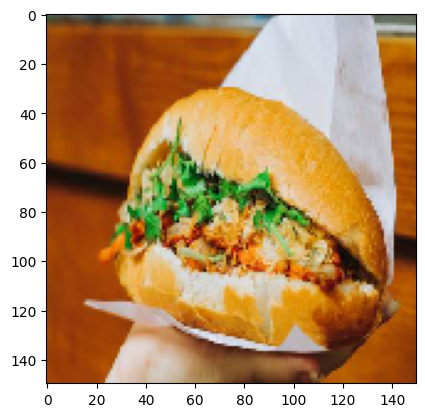

1/1 [==============================] - 0s 18ms/step
BANH CUON


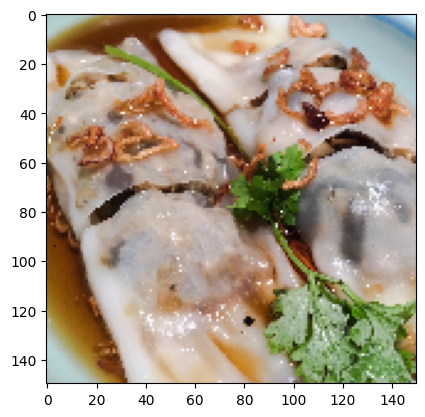

1/1 [==============================] - 0s 20ms/step
BANH XEO


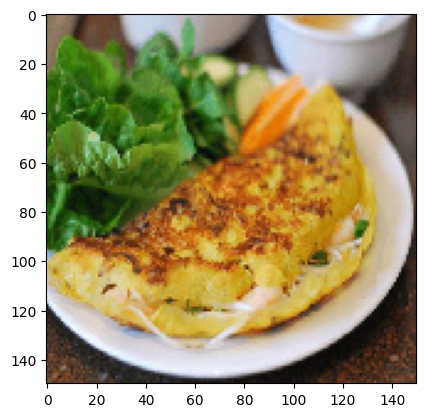

1/1 [==============================] - 0s 18ms/step
BANH CUON


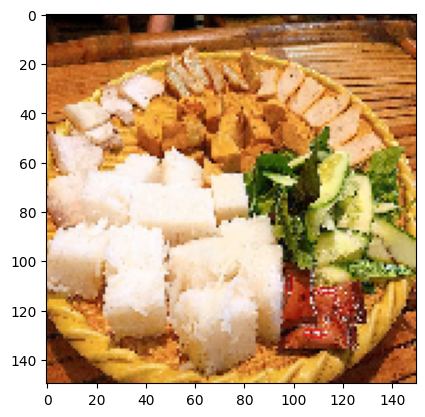

1/1 [==============================] - 0s 21ms/step
BUN DAU MAM TOM


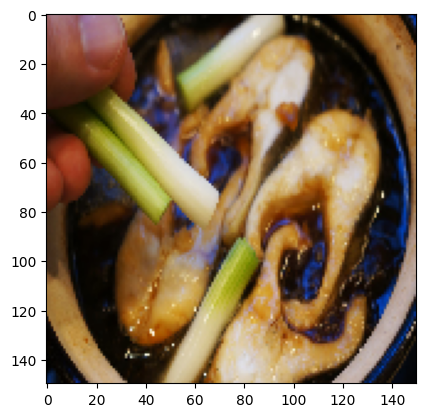

1/1 [==============================] - 0s 19ms/step
COM TAM


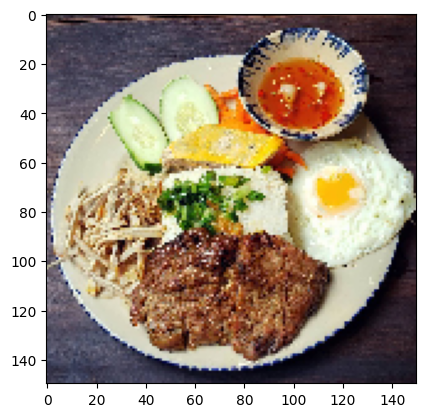

1/1 [==============================] - 0s 19ms/step
NEM


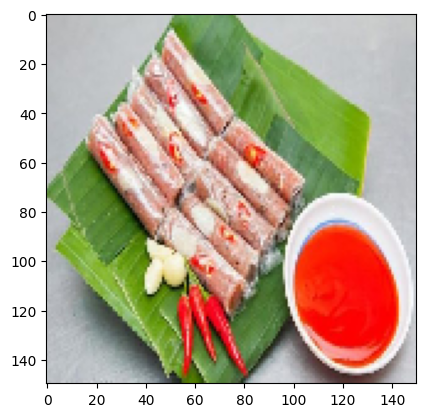

1/1 [==============================] - 0s 27ms/step
PHO


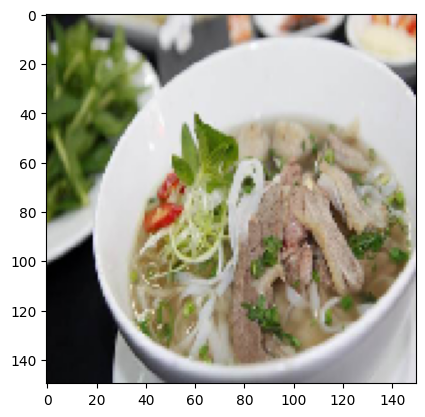

In [10]:
test="/content/drive/MyDrive/AI/Food/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['BANH CUON','BANH MI','BANH PIA','BANH TET','BANH XEO','BUN DAU MAM TOM','CA KHO TO','COM TAM','NEM','PHO']
  print(class_name[result])
  plt.show()